# Team selection
We want to choose our dream team. The rules for choosing are:

* One player in each position - PG, SG, SF, PF, C.
* One player only from each of the last five decades - 2010's, 2000's, 1990's, 1980's, 1970's.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import permutations

## Load data

In [2]:
players_df = pd.read_csv('../data/processed/player_data_cleaned.csv', header=0, index_col=0, sep=',')
players_df['decades'] = players_df['decades'].apply(lambda x: tuple(x.split('|')))
players_df['positions'] = players_df['positions'].apply(lambda x: tuple(x.split('|')))
players_df.head()

,height,weight,collage,born,birth_city,birth_state,decades,positions,OWS,DWS,...,FG%,2P%,3P%,FT%,MPG,TRG,APG,PPG,PFPG,WS48
Player,,,,,,,,,,,,,,,,,,,,,
Freddie Lewis,188.0,88.0,Eastern Kentucky University,1921.0,Brooklyn,New York,"(70s,)","(PG,)",0.4,0.2,...,0.407035,0.407035,0.000000,0.805195,17.250000,1.468750,1.750000,7.000000,1.812500,0.043478
Bob Cousy*,185.0,79.0,College of the Holy Cross,1928.0,New York,New York,"(70s,)","(PG,)",0.0,0.0,...,0.333333,0.333333,0.000000,1.000000,4.857143,0.714286,1.428571,0.714286,1.571429,0.141176
Richie Guerin*,193.0,88.0,Iona College,1932.0,New York,New York,"(70s,)","(SG,)",-0.1,0.0,...,0.272727,0.272727,0.000000,1.000000,8.000000,0.250000,1.500000,0.875000,1.125000,-0.075000
Jim Paxson,198.0,90.0,University of Dayton,1932.0,Pennville,Indiana,"(80s, 90s)","(PG, SG)",38.7,16.0,...,0.496448,0.510195,0.225877,0.808320,26.728589,1.975875,2.866104,13.927624,1.827503,0.119144
Hot Rod,193.0,83.0,NaN,1935.0,NaN,NaN,"(80s, 90s)","(PF, C)",33.5,36.9,...,0.480146,0.481075,0.105263,0.725792,29.680947,6.762120,1.794814,11.030440,2.540023,0.128720


## Choosing the dream team
Lets move on to choosing our dream team. The simplest approach is to select or create a metric by which to rank players, and select the five player which maximise this metric with respect to the rules stated above. For our first pass we will use win shares per 48 minutes (WS48), which measures how much a player contributes to a team's win on average per game (a game lasts 48 minutes). Lets look at the WS48 feature in more detail.

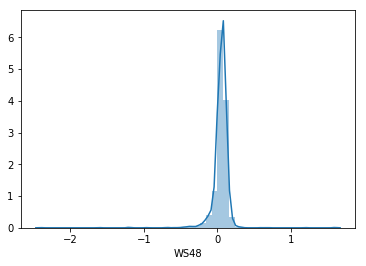

In [3]:
sns.distplot(players_df['WS48'])
plt.show()

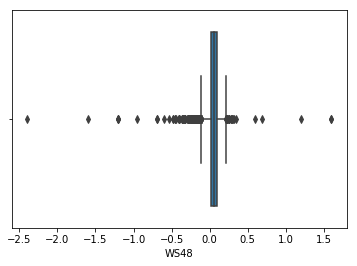

In [4]:
sns.boxplot(x='WS48', data=players_df)
plt.show()

The bulk of the distribution is around zero, with some outliers ate either end. Next lets look at the top players by WS48. Here are the top 20 players.

In [5]:
players_df.sort_values(by='WS48', ascending=False).iloc[:20, 6:]

,decades,positions,OWS,DWS,WS,FG%,2P%,3P%,FT%,MPG,TRG,APG,PPG,PFPG,WS48
Player,,,,,,,,,,,,,,,
Chad Gallagher,"(90s,)","(C,)",0.1,0.0,0.1,1.000000,1.000000,0.000000,0.000000,1.500000,0.000000,0.000000,3.000000,1.000000,1.600000
Tyson Wheeler,"(90s,)","(PG,)",0.1,0.0,0.1,1.000000,0.000000,1.000000,0.500000,3.000000,0.000000,2.000000,4.000000,1.000000,1.600000
Cedric Lewis,"(90s,)","(C,)",0.0,0.0,0.1,0.666667,0.666667,0.000000,0.000000,1.333333,0.666667,0.000000,1.333333,0.000000,1.200000
Cozell McQueen,"(80s,)","(PF,)",0.1,0.0,0.1,1.000000,1.000000,0.000000,0.000000,2.333333,2.666667,0.000000,2.000000,0.333333,0.685714
Bob Miller,"(80s,)","(PF,)",0.0,0.0,0.1,0.666667,0.666667,0.000000,0.000000,4.000000,2.500000,0.500000,2.000000,2.500000,0.600000
Alvin Heggs,"(90s,)","(SF,)",0.1,0.0,0.1,0.600000,0.600000,0.000000,0.666667,3.500000,0.500000,0.000000,2.000000,0.000000,0.342857
Korleone Young,"(90s,)","(SF,)",0.1,0.0,0.1,0.500000,0.666667,0.250000,1.000000,5.000000,1.333333,0.333333,4.333333,1.000000,0.320000
Boban Marjanovic,"(10s,)","(C,)",3.5,1.7,5.1,0.578431,0.578431,0.000000,0.779070,9.000000,3.640449,0.337079,5.483146,0.887640,0.305618
Geno Carlisle,"(00s,)","(SG,)",0.1,0.0,0.1,0.666667,0.666667,0.000000,0.666667,2.666667,0.166667,0.166667,1.333333,0.166667,0.300000


The simplest way of choosing the best team based on WS48 is to choose the highest values per position per decade, then optimise based on that list. However, many of the players have played very few minutes per game.

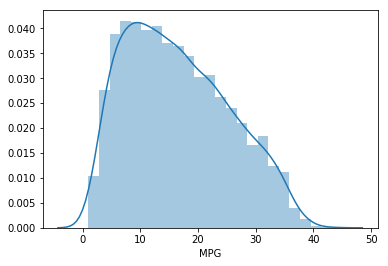

In [6]:
sns.distplot(players_df['MPG'])
plt.show()

If a player hasn't played many minutes per game they probably won't cut it for our dream team, so lets drop players who have played less than half a game (24 minutes) on average. 

In [7]:
players_df = players_df[players_df['MPG'] > 24]

As one might expect, the distribution of WS48 is now much tighter.

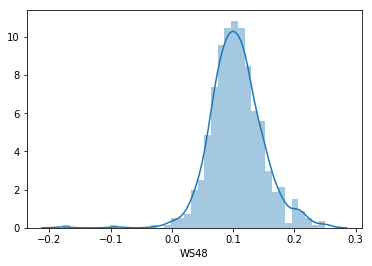

In [8]:
sns.distplot(players_df['WS48'])
plt.show()

Next, to select our team we need to flatten the players data frame so each row is a unique combination of player, decade, and position.

In [9]:
players_df_flat = players_df.reset_index() \
                            .set_index(['Player', 'positions'])['decades'] \
                            .apply(pd.Series) \
                            .stack() \
                            .reset_index() \
                            .drop('level_2', axis=1) \
                            .rename(columns={0: 'decade'}) \
                            .set_index(['Player', 'decade'])['positions'] \
                            .apply(pd.Series)\
                            .stack() \
                            .reset_index() \
                            .drop('level_2', axis=1) \
                            .rename(columns={0: 'position'})

players_df_flat = pd.merge(left=players_df_flat,
                           right=players_df.reset_index().loc[:, ['Player', 'WS48']],
                           on='Player',
                           how='outer')

players_df_flat.head(10)

,Player,decade,position,WS48
0,Jim Paxson,80s,PG,0.119144
1,Jim Paxson,80s,SG,0.119144
2,Jim Paxson,90s,PG,0.119144
3,Jim Paxson,90s,SG,0.119144
4,Hot Rod,80s,PF,0.128720
5,Hot Rod,80s,C,0.128720
6,Hot Rod,90s,PF,0.128720
7,Hot Rod,90s,C,0.128720
8,Elgin Baylor*,70s,SF,0.158788
9,Hal Greer*,70s,PG,0.076557


Next, we need to get the player with the highest WS48 for each unique combination of decade and position. We could end up with the same player in multiple positions, but lets try anyway and hope for the best!

In [10]:
top_players = players_df_flat.groupby(['decade', 'position']) \
                             .apply(lambda df: df.sort_values(by='WS48', ascending=False).iloc[0, :])

top_players

Player decade position      WS48
decade position                                                
00s    C              David Robinson*    00s        C  0.250427
       PF                LeBron James    00s       PF  0.239116
       PG                  Chris Paul    00s       PG  0.250476
       SF             Michael Jordan*    00s       SF  0.250352
       SG             Michael Jordan*    00s       SG  0.250352
10s    C                   Tim Duncan    10s        C  0.209053
       PF                LeBron James    10s       PF  0.239116
       PG                  Chris Paul    10s       PG  0.250476
       SF                LeBron James    10s       SF  0.239116
       SG                LeBron James    10s       SG  0.239116
70s    C         Kareem Abdul-Jabbar*    70s        C  0.228361
       PF                Johnny Green    70s       PF  0.170253
       PG                 Jerry West*    70s       PG  0.214137
       SF                Chet Walker*    70s       SF  0.204036
       SG             Marques Johnson    70s       SG  0.161459
80s    C         Kareem Abdul-Jabbar*    80s        C  0.228361
       PF              Magic Johnson*    80s       PF  0.224804
       PG              Magic Johnson*    80s       PG  0.224804
       SF             Michael Jordan*    80s       SF  0.250352
       SG             Michael Jordan*    80s       SG  0.250352
90s    C              David Robinson*    90s        C  0.250427
       PF              Magic Johnson*    90s       PF  0.224804
       PG              Magic Johnson*    90s       PG  0.224804
       SF             Michael Jordan*    90s       SF  0.250352
       SG             Michael Jordan*    90s       SG  0.250352

Now we must find the best combination of player - i.e. the combination with the highest mean WS48 score - based on the rules described above. First, we need every permutation of team configuration by decade and position.

In [11]:
decades = top_players['decade'].unique().tolist()
positions = top_players['position'].unique().tolist()

team_perms = pd.DataFrame([list(zip(decade, positions)) for decade in permutations(decades, len(positions))])

team_perms.head()

,0,1,2,3,4
0,"(00s, C)","(10s, PF)","(70s, PG)","(80s, SF)","(90s, SG)"
1,"(00s, C)","(10s, PF)","(70s, PG)","(90s, SF)","(80s, SG)"
2,"(00s, C)","(10s, PF)","(80s, PG)","(70s, SF)","(90s, SG)"
3,"(00s, C)","(10s, PF)","(80s, PG)","(90s, SF)","(70s, SG)"
4,"(00s, C)","(10s, PF)","(90s, PG)","(70s, SF)","(80s, SG)"


Next, we calculate the mean WS48 for each permutation.

In [12]:
team_perms['WS48'] = team_perms.apply(lambda row: top_players.loc[row.tolist(), 'WS48'].tolist()).mean(axis=1)

team_perms.head()

,0,1,2,3,4,WS48
0,"(00s, C)","(10s, PF)","(70s, PG)","(80s, SF)","(90s, SG)",0.240877
1,"(00s, C)","(10s, PF)","(70s, PG)","(90s, SF)","(80s, SG)",0.240877
2,"(00s, C)","(10s, PF)","(80s, PG)","(70s, SF)","(90s, SG)",0.233747
3,"(00s, C)","(10s, PF)","(80s, PG)","(90s, SF)","(70s, SG)",0.225232
4,"(00s, C)","(10s, PF)","(90s, PG)","(70s, SF)","(80s, SG)",0.233747


Finally, lets choose the best team.

In [13]:
best_team_perm_df = team_perms[team_perms['WS48'] == team_perms['WS48'].max()]
best_team_perm = pd.Series(best_team_perm_df.iloc[0, :5].T).tolist()
best_team_ws48 = best_team_perm_df.iloc[0, -1]

best_team = top_players.loc[best_team_perm, ['Player', 'WS48']] \
                       .reset_index() \
                       .set_index('Player')

best_team

,decade,position,WS48
Player,,,
Kareem Abdul-Jabbar*,70s,C,0.228361
LeBron James,00s,PF,0.239116
Chris Paul,10s,PG,0.250476
Michael Jordan*,80s,SF,0.250352
Michael Jordan*,90s,SG,0.250352


Michael Jordan has been duplicated, so our shortcut didn't work. Lets look at the top five best teams and see if they meet the criteria.

In [14]:
team_perms_sorted = team_perms.sort_values('WS48', ascending=False)
best_teams = []
for k in range(5):
    best_team_perm_df = team_perms[team_perms['WS48'] == team_perms_sorted.loc[k, 'WS48']]
    best_team_perm = pd.Series(best_team_perm_df.iloc[0, :5].T).tolist()
    best_team_ws48 = best_team_perm_df.iloc[0, -1]

    best_teams.append(top_players.loc[best_team_perm, ['Player', 'WS48']] \
                                 .reset_index() \
                                 .set_index('Player'))

    print(best_teams[-1])
    print('Mean WS48 = {}'.format(team_perms_sorted.loc[k, 'WS48']))

                decade position      WS48
Player                                   
David Robinson*    00s        C  0.250427
LeBron James       10s       PF  0.239116
Jerry West*        70s       PG  0.214137
Michael Jordan*    80s       SF  0.250352
Michael Jordan*    90s       SG  0.250352
Mean WS48 = 0.24087695580977178
                decade position      WS48
Player                                   
David Robinson*    00s        C  0.250427
LeBron James       10s       PF  0.239116
Jerry West*        70s       PG  0.214137
Michael Jordan*    80s       SF  0.250352
Michael Jordan*    90s       SG  0.250352
Mean WS48 = 0.24087695580977178
                decade position      WS48
Player                                   
David Robinson*    00s        C  0.250427
LeBron James       10s       PF  0.239116
Magic Johnson*     80s       PG  0.224804
Chet Walker*       70s       SF  0.204036
Michael Jordan*    90s       SG  0.250352
Mean WS48 = 0.2337470666311053
                decade 

The third highest permutation meets our criteria, and has a mean WS48 very close to the best, so lets go with this for our final team. Given more time we could address this issue more throroughly, but this is acceptable for now. Lets save our best team for later use.

In [15]:
best_teams[2].to_csv('../data/processed/best_team.csv', header=True, index=True, sep=',')